In [1]:
import pandas as pd # type: ignore
import os
import psycopg2 # type: ignore
from dotenv import load_dotenv # type: ignore

import sys
sys.path.append("../")
from src import conexion_bd as con
from src import consultas_sql as sel
from src import visualizaciones as vi

load_dotenv()

True

In [2]:
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

In [3]:
# Conectar a la base de datos
conn, cursor = con.create_connection(user,password,host,port,database)

id = 1
df_data_filmaffinity = sel.select_data(conn,cursor,id)

# Cerrar la conexión
con.close_connection(conn, cursor)

conn, cursor = con.create_connection(user,password,host,port,database)

id = 2
df_data_imdb = sel.select_data(conn,cursor,id)

# Cerrar la conexión
con.close_connection(conn, cursor)

Conexión a la base de datos establecida con éxito.
Conexión a la base de datos cerrada con éxito.
Conexión a la base de datos establecida con éxito.
Conexión a la base de datos cerrada con éxito.


In [4]:
df_data_filmaffinity['rating_libro'] = df_data_filmaffinity['rating_libro'].str.extract(r'(\d+\.\d+)').astype(float)
df_data_imdb['rating_libro'] = df_data_imdb['rating_libro'].str.extract(r'(\d+\.\d+)').astype(float)

In [5]:
display(df_data_filmaffinity.head())
display(df_data_filmaffinity.shape[0])

,id,nombre,id,title,rating_video,rating_libro,numero_plataformas,id_web
0,1,filmaffinity,1,The Godfather,9.0,4.39,2,1
1,1,filmaffinity,2,The Godfather: Part II,8.9,3.92,0,1
2,1,filmaffinity,3,The Shawshank Redemption,8.6,4.48,1,1
3,1,filmaffinity,4,Witness for the Prosecution,8.6,4.07,1,1
4,1,filmaffinity,5,Schindler's List,8.6,4.34,2,1


99

In [6]:
display(df_data_imdb.head())
display(df_data_imdb.shape[0])

,id,nombre,id,title,rating_video,rating_libro,numero_plataformas,id_web
0,2,imdb,100,The Godfather,9.2,4.39,2,2
1,2,imdb,101,The Godfather Part II,9.0,3.92,1,2
2,2,imdb,102,The Lord of the Rings: The Return of the King,9.0,4.62,3,2
3,2,imdb,103,The Lord of the Rings: The Fellowship of the Ring,8.9,4.65,3,2
4,2,imdb,104,Forrest Gump,8.8,4.02,2,2


66

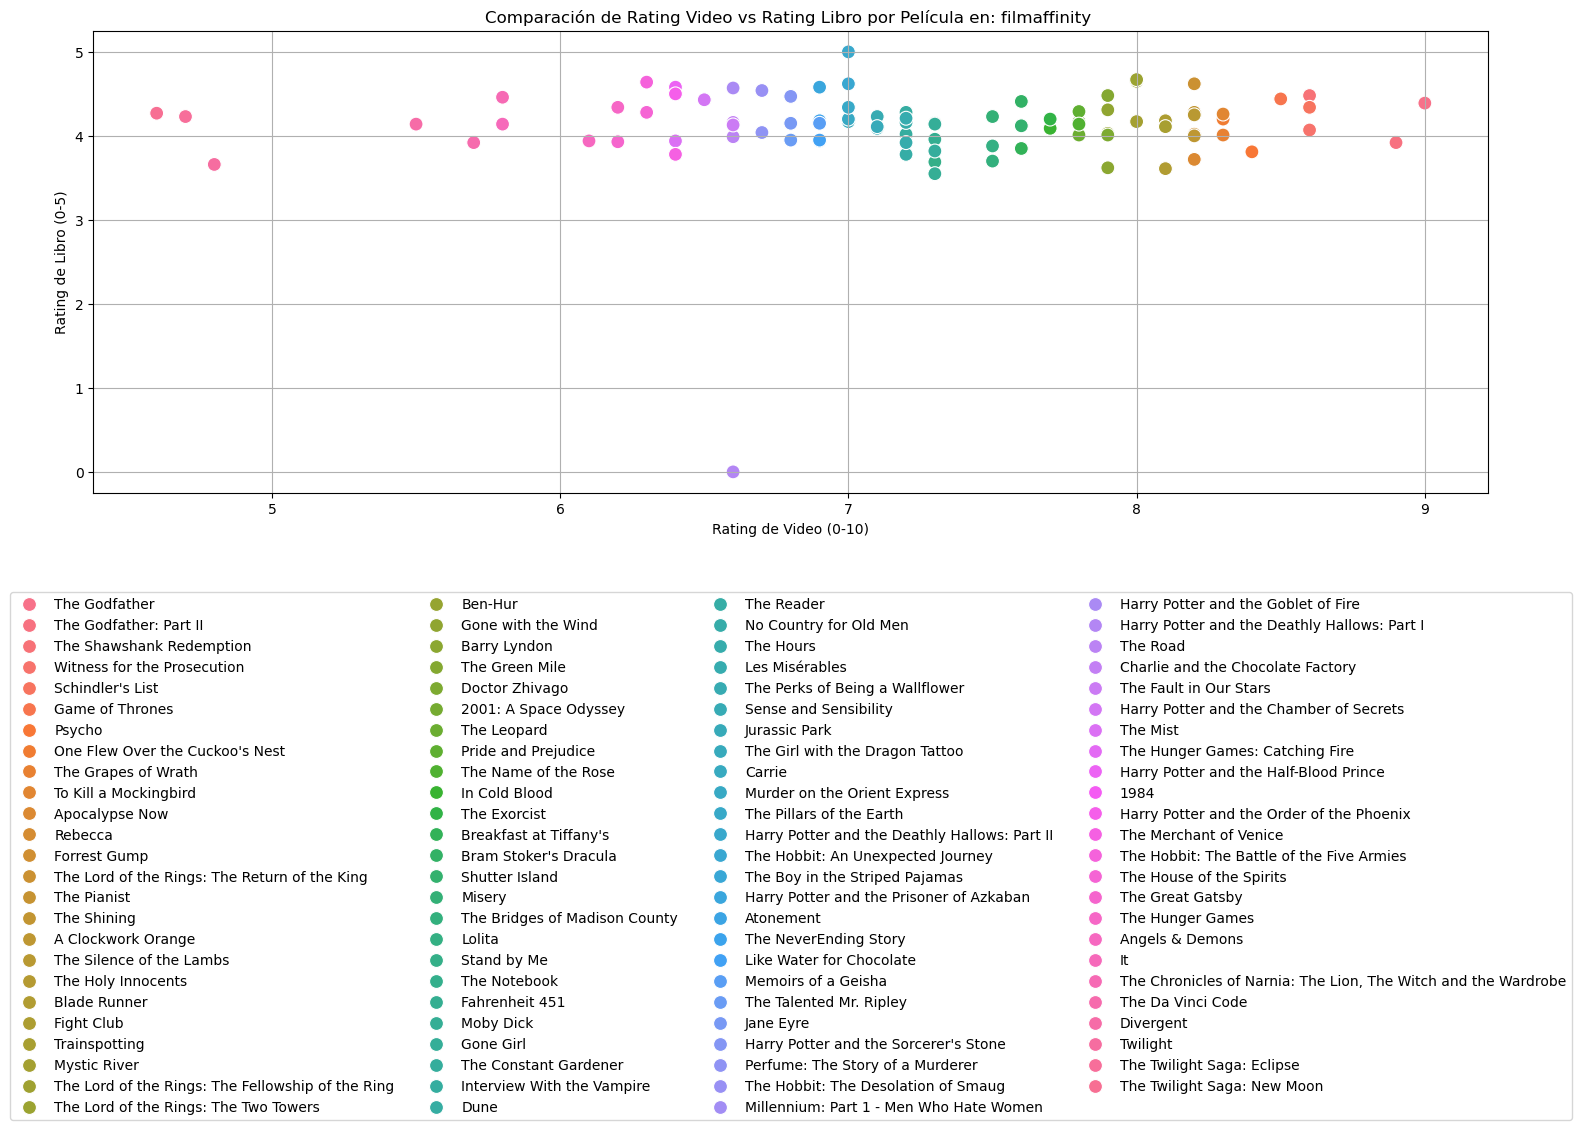

In [7]:
vi.visualizar_comparativa_rating(df_data_filmaffinity, "filmaffinity")

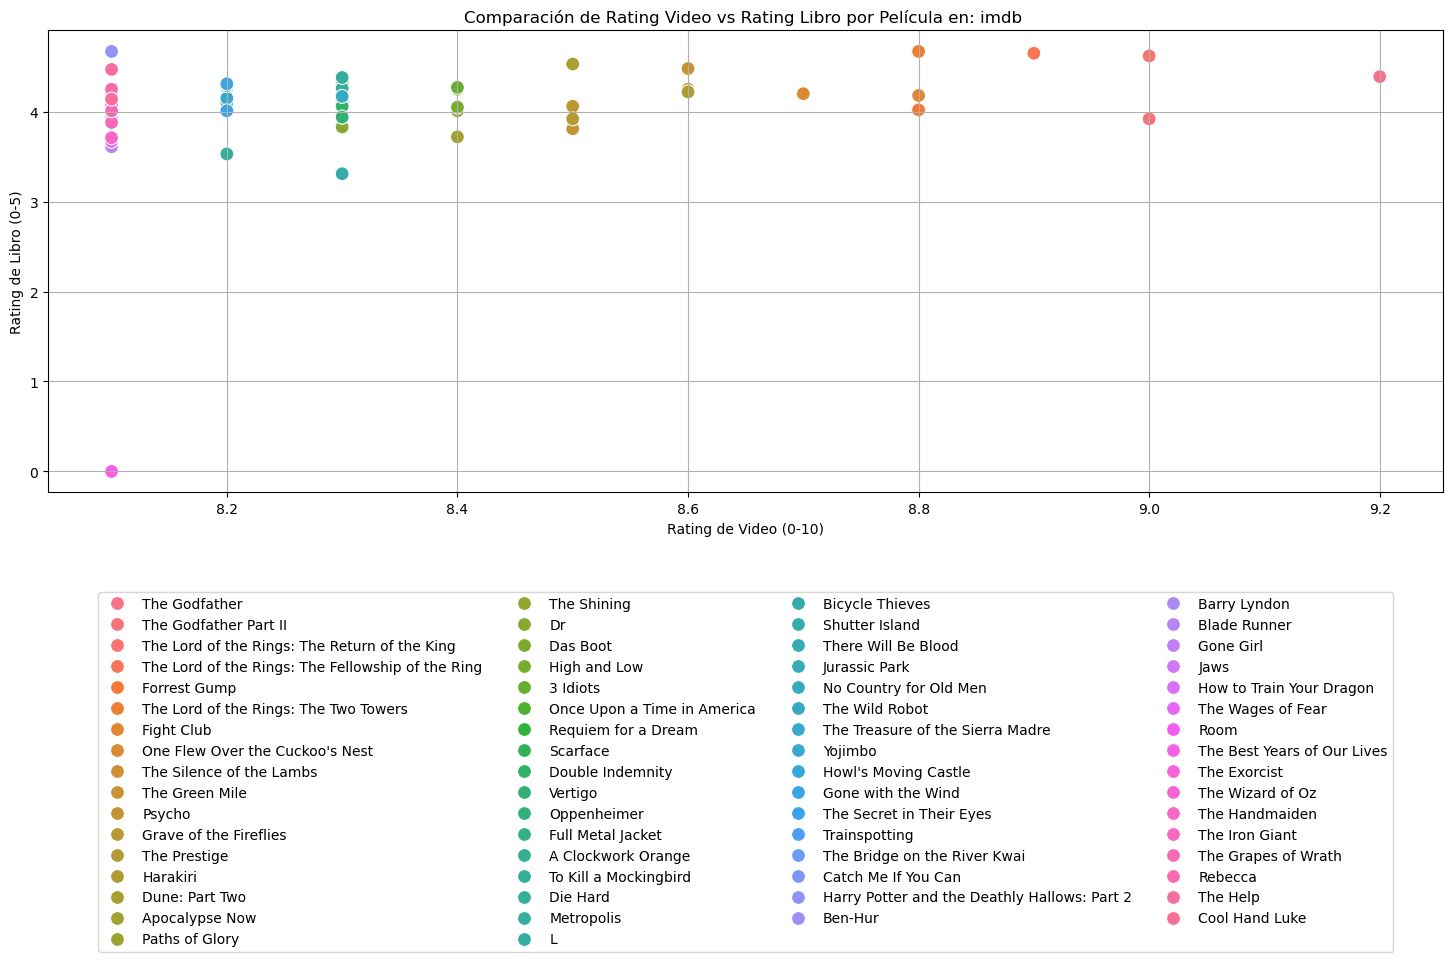

In [8]:
vi.visualizar_comparativa_rating(df_data_imdb, "imdb")

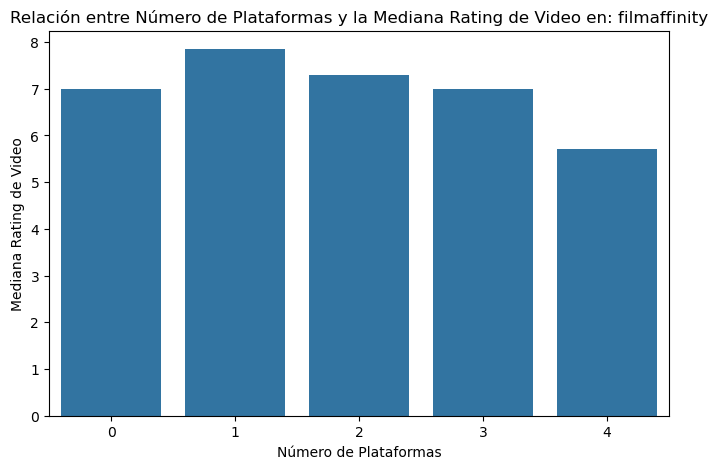

In [9]:
vi.visualizar_comparativa_plataformas(df_data_filmaffinity, "filmaffinity")

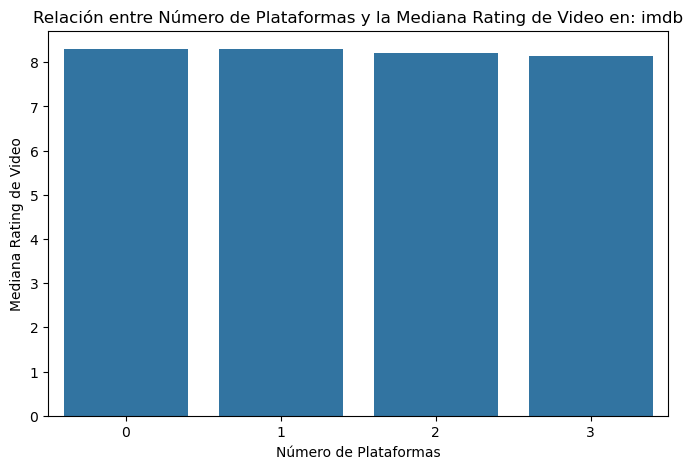

In [10]:
vi.visualizar_comparativa_plataformas(df_data_imdb, "imdb")

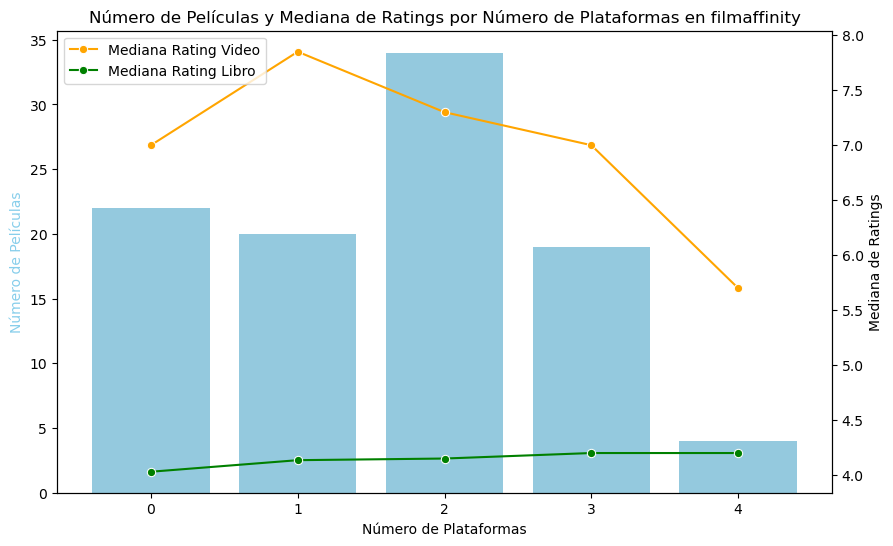

In [11]:
vi.visualizar_cantidad(df_data_filmaffinity, "filmaffinity")

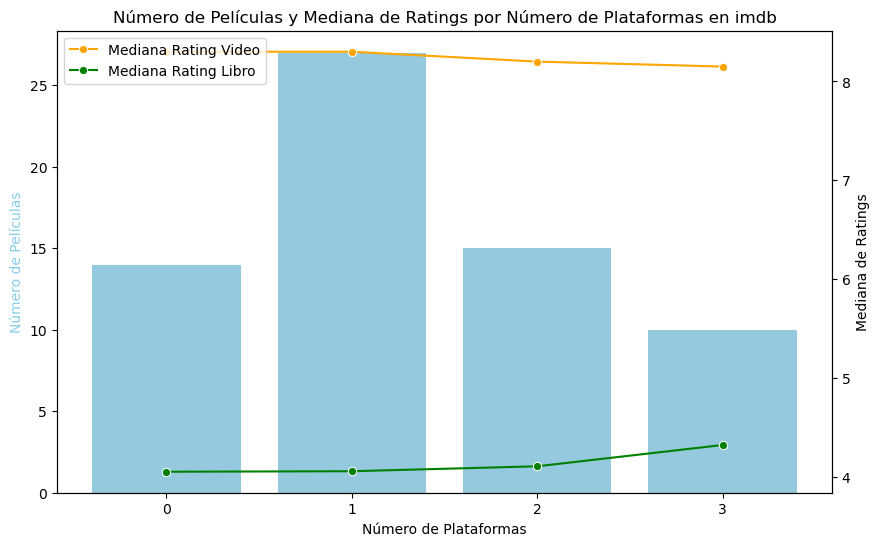

In [12]:
vi.visualizar_cantidad(df_data_imdb, "imdb")